<a href="https://colab.research.google.com/github/dianabutch023/IS4487/blob/main/lab4_social_media_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Lab 4

## Outline

Repeat exercises from Lab 2, but with the *X SuperBowl* social media dataset
- Loading installed packages
- Inspect data
- Explore plot types

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab4_social_media_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# X API Data Dictionary
See https://developer.x.com/en/docs/x-api/data-dictionary/introduction

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [28]:
import pandas as pd
import matplotlib as mpl
import sklearn as sl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the X SuperBowl dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe
- Make sure you watch for line breaks and emojis that might cause problems with the data import

In [3]:
df = pd.read_csv('https://github.com/Stan-Pugsley/is_4487_base/blob/main/Labs/DataSets/x_superbowl.csv?raw=true')
print(df.describe)

print(df.info)

<bound method NDFrame.describe of                     created_at  \
0     2024-02-12T01:52:00.000Z   
1     2024-02-12T01:20:00.000Z   
2     2024-02-12T01:15:36.000Z   
3     2024-02-12T01:15:17.000Z   
4     2024-02-12T02:01:18.000Z   
...                        ...   
9372  2024-02-12T01:59:49.000Z   
9373  2024-02-12T01:59:25.000Z   
9374  2024-02-12T01:59:22.000Z   
9375  2024-02-12T01:57:11.000Z   
9376  2024-02-12T01:56:56.000Z   

                                                   text      conversation_id  \
0      Fireman at the Superbowl https://t.co/AjqmmHvDQl  1756858660205015180   
1     Watch the #SuperBowl ads for #GhostsCBS, #Fire...  1756850607573623005   
2     Watch the #Tracker and #FireCountry #SuperBowl...  1756828194647527707   
3     I can't believe Norman Bates brother is a fire...  1756849420442681386   
4     👉 @NFL &amp; @fifa may be occut but some of th...  1756861000693739724   
...                                                 ...                  ... 

In [4]:
df.describe()


,conversation_id,author_id,id,edit_controls.edits_remaining,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.bookmark_count,public_metrics.impression_count,in_reply_to_user_id
count,9.377000e+03,9.377000e+03,9.377000e+03,9377.000000,9377.000000,9377.000000,9377.000000,9377.000000,9377.000000,9377.000000,1.180000e+03
mean,1.756688e+18,6.452886e+17,1.756863e+18,4.995734,160.414632,0.265970,3.108883,0.057374,0.142903,493.430308,3.334129e+17
std,7.212529e+15,7.084168e+17,1.869442e+13,0.068371,617.853377,1.720208,35.093719,0.651784,2.273449,4247.759998,5.880940e+17
min,1.378505e+18,1.299700e+04,1.756825e+18,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.846000e+03
25%,1.756844e+18,2.176677e+08,1.756846e+18,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.692197e+07
50%,1.756864e+18,3.230979e+09,1.756866e+18,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.949206e+08
75%,1.756879e+18,1.380642e+18,1.756880e+18,5.000000,42.000000,0.000000,0.000000,0.000000,0.000000,252.000000,7.313111e+17
max,1.756887e+18,1.756883e+18,1.756887e+18,5.000000,4760.000000,78.000000,2043.000000,27.000000,127.000000,246031.000000,1.756813e+18


## Prepare Data

➡️ Assignment Tasks
- Convert any numbers, such as user_mentioned, from strings into numbers
- Reduce the variables in your dataframe to only those that have useful data
- Optional: Locate outliers in any of the variables.   Filter them out if they are mistakes; keep them if they are exceptional cases.

In [5]:
#convert strings in data set to numbers
# doesn't need to be done since the values that need to be a float or int already are

In [6]:
# reduce variables
df_clean = df.drop('edit_controls.edits_remaining', axis = 1)
df_clean = df.drop('public_metrics.quote_count', axis = 1)
df_clean = df.drop('attachments.media_source_tweet_id', axis = 1)
df_clean = df.drop('entities.cashtags', axis = 1)
df_clean = df.drop('withheld.country_codes', axis = 1)

print(df_clean)

                    created_at  \
0     2024-02-12T01:52:00.000Z   
1     2024-02-12T01:20:00.000Z   
2     2024-02-12T01:15:36.000Z   
3     2024-02-12T01:15:17.000Z   
4     2024-02-12T02:01:18.000Z   
...                        ...   
9372  2024-02-12T01:59:49.000Z   
9373  2024-02-12T01:59:25.000Z   
9374  2024-02-12T01:59:22.000Z   
9375  2024-02-12T01:57:11.000Z   
9376  2024-02-12T01:56:56.000Z   

                                                   text      conversation_id  \
0      Fireman at the Superbowl https://t.co/AjqmmHvDQl  1756858660205015180   
1     Watch the #SuperBowl ads for #GhostsCBS, #Fire...  1756850607573623005   
2     Watch the #Tracker and #FireCountry #SuperBowl...  1756828194647527707   
3     I can't believe Norman Bates brother is a fire...  1756849420442681386   
4     👉 @NFL &amp; @fifa may be occut but some of th...  1756861000693739724   
...                                                 ...                  ...   
9372  RT @AlertesInfos: 🏈🇺🇸 Le 

## Summarize Data

➡️ Assignment Tasks
- Create at least two charts to summarize and visualize the data
- Examples include: Number of posts per device; top 10 posts with highest engagement

In [ ]:
#chart 1: Number of impressions per like on top 10 posts


In [7]:
# Calculate the like to impression ratio
df_clean['like_impression_ratio'] = df_clean['public_metrics.like_count'] / df_clean['public_metrics.impression_count']

# Sort the dataframe by like_impression_ratio in descending order
top_ten_posts = df_clean.sort_values('like_impression_ratio', ascending=False).head(10)

# Display the like to impression ratio for the top ten posts
print(top_ten_posts[['public_metrics.like_count', 'public_metrics.impression_count', 'like_impression_ratio']])


      public_metrics.like_count  public_metrics.impression_count  \
6171                          5                                3   
6170                          5                                3   
6172                          5                                3   
2228                          3                                6   
2227                          3                                6   
5384                          5                               13   
2114                          2                                7   
2192                          2                                7   
2193                          2                                7   
2115                          2                                7   

      like_impression_ratio  
6171               1.666667  
6170               1.666667  
6172               1.666667  
2228               0.500000  
2227               0.500000  
5384               0.384615  
2114               0.285714  
2192       

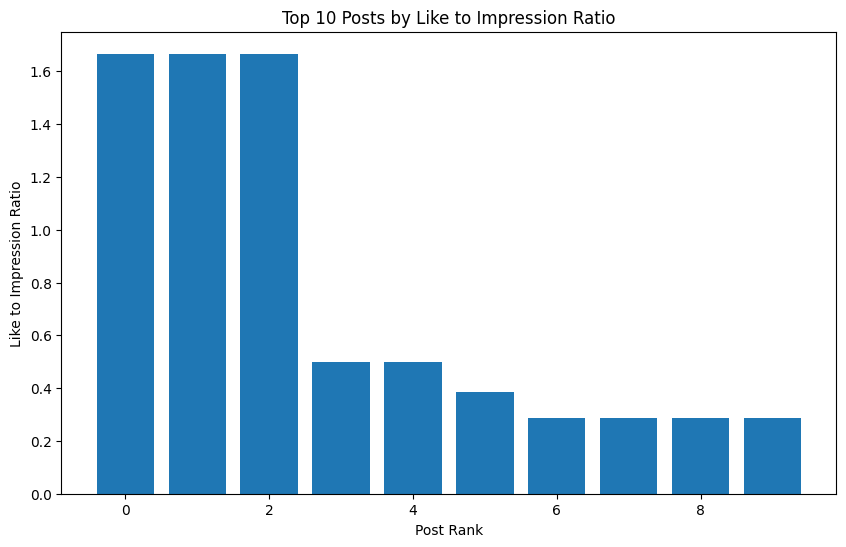

In [9]:
top_ten_ratios = top_ten_posts['like_impression_ratio']

plt.figure(figsize=(10, 6))
plt.bar(range(len(top_ten_ratios)), top_ten_ratios)
plt.xlabel('Post Rank')
plt.ylabel('Like to Impression Ratio')
plt.title('Top 10 Posts by Like to Impression Ratio')
plt.show()


55.94539831502613


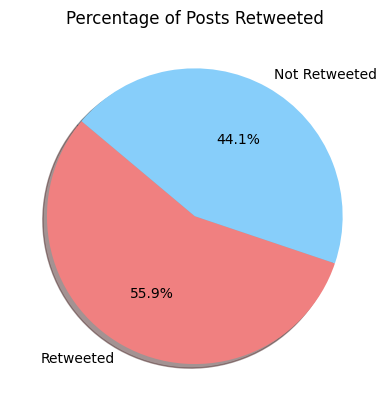

In [31]:
#chart 2: Calculate the percentage of posts that were retweeted and pie chart
percentage_retweeted = (df_clean['public_metrics.retweet_count'] > 0).mean() * 100

print(percentage_retweeted)

labels = ['Retweeted', 'Not Retweeted']
sizes = [percentage_retweeted, 100 - percentage_retweeted]
colors = ['lightcoral', 'lightskyblue']
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Percentage of Posts Retweeted')
plt.show()